3.3. Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

Вариант 23
|       |            |            |             |           |            |            |
| ----- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| i     | 0          | 1          | 2          | 3          | 4          | 5          |
| X_i   | 0.1        | 0.5        | 0.9        | 1.3        | 1.7        | 2.1        |
| f_i   | 10.0       | 2.0        | 1.1111     | 0.76923    | 0.58824    | 0.47619    |


In [51]:
X = [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
F = [10.0, 2.0, 1.1111, 0.76923, 0.58824, 0.47619]

$$ a_0 * (N - 1)  + a_1 * \sum_{j = 1}^{N} x_j = \sum_{j = 1}^{N} y_j $$


$$ a_0 * \sum_{j = 1}^{N} x_j  + a_1 * \sum_{j = 1}^{N} x_j ^ 2 = \sum_{j = 1}^{N}(y_j x_j) $$

In [52]:
A = [[len(X) , sum(X)], [sum(X), sum(x**2 for x in X)]]

In [53]:
B = [sum(F), sum([F[i] * X[i] for i in range(len(X))])]

In [54]:
def dot(A, B):
    if len(A) != len(B):
        print("ERROR")
        return None
    res = 0
    for i in range(len(A)):
        res += A[i] * B[i]
    return res

def LU(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    
    for k in range(n):
        L[k][k] = 1.0
        U[k][k] = A[k][k] - dot(L[k][:k], [U[i][k] for i in range(k)])
        for j in range(k + 1, n):
            U[k][j] = A[k][j] - dot(L[k][:k], [U[i][j] for i in range(k)])
        for i in range(k+1, n):
            L[i][k] = (A[i][k] - dot(L[i][:k], [U[j][k] for j in range(k)])) / U[k][k]
    
    return L, U

def solve(A, B):
    n = len(B)
    X = [0 for i in range(n)]
    tmp = [0 for i in range(n)]
    L, U = LU(A)

    for i in range(n):
        s = 0
        j = 0
        while j < i:
            if j != i:
                s += tmp[j] * L[i][j]
            j += 1
        tmp[i] = B[i] - s

    i = n - 1
    while i >= 0:
        s = tmp[i]
        j = n - 1
        while j > i:
            s -= U[i][j] * X[j]
            j -= 1
        X[i] = s / U[i][i]
        i -= 1
   
    return X


In [55]:
a = solve(A, B)

In [56]:
def F1(x, a):
    return a[0] + x * a[1]

#### Ошибка

In [57]:
def error (F, X, F1, a):
    return sum([(F1(X[i], a) - F[i])**2 for i in range(len(X))])

In [58]:
e = error(F, X, F1, a)

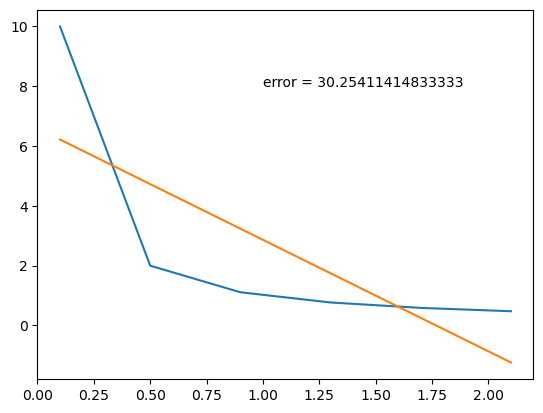

In [59]:
import matplotlib.pyplot as plt

plt.plot(X, F)
plt.plot(X, [F1(x, a) for x in X])
plt.text(1, 8, 'error = ' + str(e))
plt.show()

<Б>

In [60]:
A = [[len(X), sum(X), sum([x**2 for x in X])], 
[sum(X), sum([x**2 for x in X]), sum([x**3 for x in X])], 
[sum([x**2 for x in X]), sum([x**3 for x in X]), sum([x**4 for x in X])]]
B = [sum(F), sum([F[i] * X[i] for i in range(len(X))]), sum([F[i] * X[i]**2 for i in range(len(X))])]

In [61]:
def F2(X, a):
    return a[0] + a[1] * X + a[2] * X**2

##### Ошибка

In [62]:
a2 = solve(A, B)
e2 = error(F, X, F2, a2)

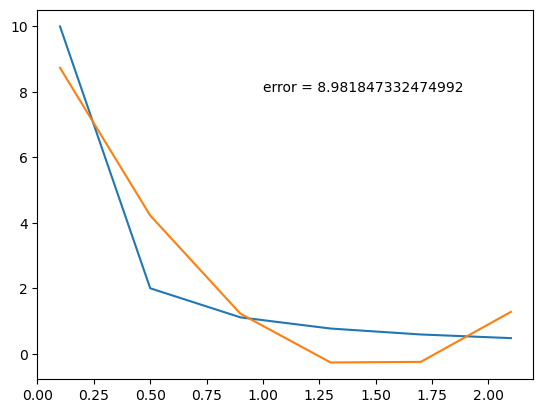

In [63]:
plt.plot(X, F)
plt.plot(X, [F2(x, a2) for x in X])
plt.text(1, 8, 'error = ' + str(e2))
plt.show()